# Quickstart

In this first tutorial we load a data file, perform Debye decomposition on it,
visualize the fit quality and posterior distribution and save results to a csv
file. A more in-depth look at the Debye Decomposition results is available in
the :ref:`Decomposition` tutorial.

## Running your first inversion

To invert a SIP data file, you would use the following approach:
- Import the base `Dias2000` model.
- Pass `filepath` to instantiate the model with a specific data file.
- Set the simulation to run for 2000 steps by passing `nsteps=2000`.
- Set the simulation to explore the Dias model parameter space
  with `nwalkers=32`.
- Fit the model to the data by calling the `fit()` method.

In [ ]:
import os

import numpy as np
import bisip
from bisip import Dias2000

# This will get one of the example data files in the BISIP package
filepath = 'data/SIP-K389176.dat'
filepath = os.path.join(os.path.dirname(bisip.__file__), filepath)

model = Dias2000(filepath=filepath,
                 nwalkers=32,  # number of MCMC walkers
                 nsteps=100000,  # number of MCMC steps
                 headers=7,  # number of headers to skip in the file
                 )

# Fit the model to this data file
model.fit()

 61%|██████    | 60810/100000 [01:39<01:05, 597.96it/s]

## Visualizing the parameter traces

Visual inspection of the traces of each MCMC walker is a good way to quickly assess how well the inversion went. They also define what we consider samples of the posterior distribution. Let's inspect the parameter traces.

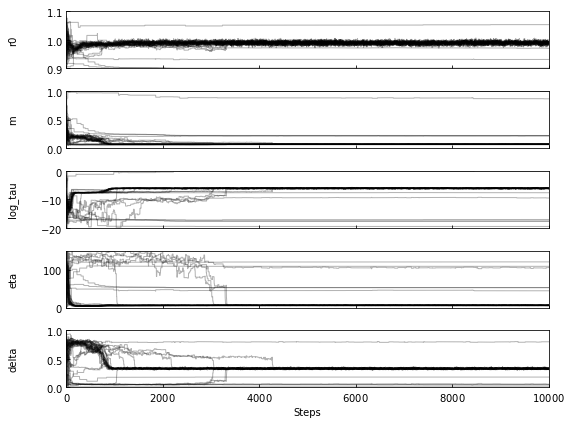

In [29]:
# Plot the parameter traces
fig = model.plot_traces()

The chains reach a stationary state after at least 500 iterations. We should therefore keep only the values after the 500th step to estimate the best values for our parameters.

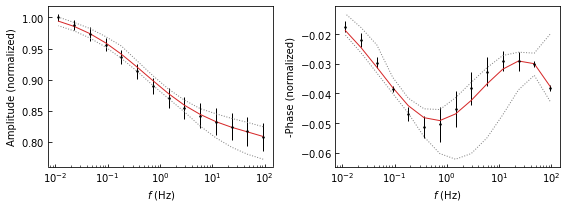

In [27]:
fig = model.plot_fit_pa(discard=500)